# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


a. Explora la fuente de datos: ¿qué representa el dataset? ¿Hay información sobre las columnas?

In [139]:
data_2019 = pd.read_csv('/content/drive/MyDrive/Protalento/proyecto 3/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Protalento/proyecto 3/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/drive/MyDrive/Protalento/proyecto 3/flujo-vehicular-2017.csv', sep =',')

In [140]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [141]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [142]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [143]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [144]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [145]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [146]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


El dataset suministra información del paso de vehículos por las unidades de peaje AUSA. con una frecuencia de actualización mensual bajo la responsabilidad de Autopistas Urbanas (AUSA). Secretaría de Transporte y Obras Públicas. Jefatura de Gabinete de Ministros . Además se puede observar que en las bases de Datos no hay Datos nulos.



##### Los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

b. Realiza un análisis exploratorio que incluya:




In [147]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   hora_inicio     int64 
 3   hora_fin        int64 
 4   dia             object
 5   estacion        object
 6   sentido         object
 7   tipo_vehiculo   object
 8   forma_pago      object
 9   cantidad_pasos  int64 
dtypes: int64(4), object(6)
memory usage: 298.8+ MB


El dataset que contienen la información de flujo vehicular durante los tres años tiene un tamaño de 3'560.706 entradas. con 10 variables de estudio.

In [148]:
dataset.head()


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [149]:
dataset.tail()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1
1372644,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,4


El inicio y final de la base de datos esta en el orden en que fue concatenadas las tres bases de datos. 

In [150]:
dataset.describe()

,periodo,hora_inicio,hora_fin,cantidad_pasos
count,3.560706e+06,3.560706e+06,3.560706e+06,3.560706e+06
mean,2.017843e+03,1.195313e+01,1.207470e+01,1.052144e+02
std,7.673381e-01,6.583099e+00,6.651320e+00,3.206278e+02
min,2.017000e+03,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.017000e+03,7.000000e+00,7.000000e+00,2.000000e+00
50%,2.018000e+03,1.200000e+01,1.200000e+01,8.000000e+00
75%,2.018000e+03,1.700000e+01,1.800000e+01,3.400000e+01
max,2.019000e+03,2.300000e+01,2.300000e+01,6.677000e+03


Se puede decir que la cantidad de vehiculos que transitan por las estaciones de peaje proporcionadas, tienen una alta desviación estandar con respecto a la media. Es evidente que existe un(os) outlier(s) pues el 75% de los datos esta por debajo de 34 vehiculos, pero entre el 75% y 100% de los datos existe un valor maximo 6677 vehiculos, esto lleva a suponer que pueden existir valores de ese orden que hace que haya influencia considerable en la media.

Por otra parte, la variable periodo hace referencia que los dataset iniciales tenian aproximadamente la misma cantidad de datos.

Los estadisticos de la hora de inicio y hora fin tienen valores similares por su misma naturaleza. de que los peajes tienen atención continua la hora de inicio de un registro, sera la misma hora final del anterior registro.

In [151]:
dataset.isna().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

Como era de esperar, el nuevo dataset no tiene datos nulos, esto se debe a que los anteriores dataset no los tenian, y además mantenian las mismas variables de estudio. 

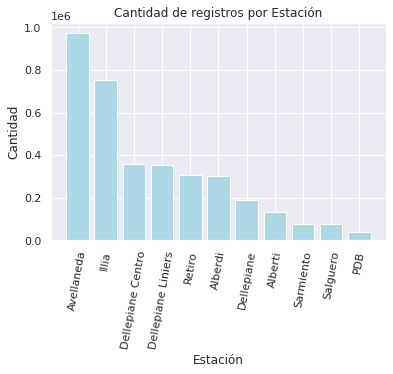

In [152]:
AgrEs=dataset["estacion"].value_counts()
x=AgrEs.index
y=AgrEs.values
plt.bar(x,y,color=["lightblue"])
plt.xticks(rotation=80)
plt.xlabel("Estación")
plt.ylabel("Cantidad")
plt.title("Cantidad de registros por Estación")
plt.show()

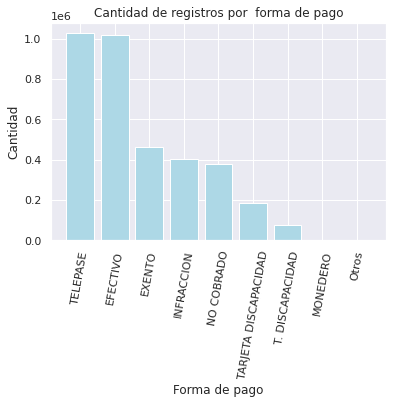

In [153]:
AgrPag=dataset["forma_pago"].value_counts()
x=AgrPag.index
y=AgrPag.values
plt.bar(x,y,color=["lightblue"])
plt.xticks(rotation=80)
plt.xlabel("Forma de pago")
plt.ylabel("Cantidad")
plt.title("Cantidad de registros por  forma de pago")
plt.show()

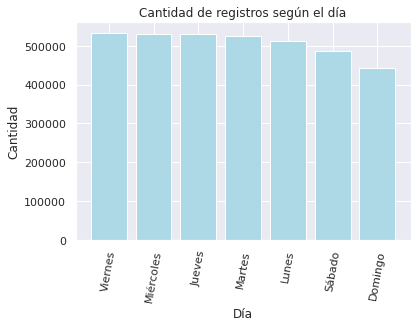

In [154]:
AgrD=dataset["dia"].value_counts()
x=AgrD.index
y=AgrD.values
plt.bar(x,y,color=["lightblue"])
plt.xticks(rotation=80)
plt.xlabel("Día")
plt.ylabel("Cantidad")
plt.title("Cantidad de registros según el día")
plt.show()

De las gráficas se puede concluir que la estación con mayor flujo vehicular es  Avellaneda y la segunda con mayor flujo es Ilia. Estación con menor flujo es PDB aquella estación que se unifico Dellepiane Liniers y Centro. Algo que no me esperaba es que los domingos haya menor flujo vehicular, pues suponia que debia estar por lo menos al mismo nivel que los viernes.


Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


c. Responde: ¿es necesario hacer alguna transformación de datos? ¿Hay nulls o columnas que no aportan información? Justifica.

In [155]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
#mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
#dataset = dataset[mask]


Sigiendo la sugerencia de este proyecto y además por el hecho de tener muchos datos hace que el estudio del modelo se muy general y su comprensión sea un poco más complejo, si es necesario realizar una transformación de los datos de estudió. 

In [156]:
dataset=dataset[dataset.estacion=='Illia']
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752552 entries, 19 to 1372328
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         752552 non-null  int64 
 1   fecha           752552 non-null  object
 2   hora_inicio     752552 non-null  int64 
 3   hora_fin        752552 non-null  int64 
 4   dia             752552 non-null  object
 5   estacion        752552 non-null  object
 6   sentido         752552 non-null  object
 7   tipo_vehiculo   752552 non-null  object
 8   forma_pago      752552 non-null  object
 9   cantidad_pasos  752552 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 63.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,NO COBRADO,146
20,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019,2019-01-01,0,1,Martes,Illia,Centro,Pesado,TELEPASE,1
22,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,NO COBRADO,147
23,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,TELEPASE,106


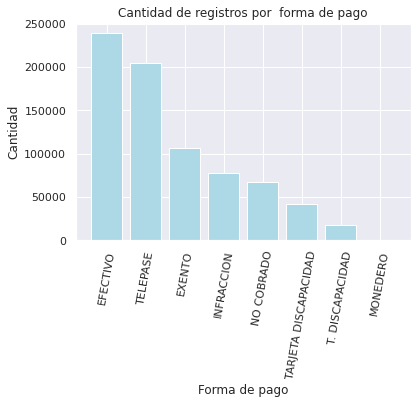

In [157]:
AgrPag=dataset["forma_pago"].value_counts()
x=AgrPag.index
y=AgrPag.values
plt.bar(x,y,color=["lightblue"])
plt.xticks(rotation=80)
plt.xlabel("Forma de pago")
plt.ylabel("Cantidad")
plt.title("Cantidad de registros por  forma de pago")
plt.show()

In [158]:
dataset.describe()

,periodo,hora_inicio,hora_fin,cantidad_pasos
count,752552.000000,752552.000000,752552.000000,752552.000000
mean,2017.826235,11.904922,12.012598,135.825550
std,0.756176,6.582095,6.643998,386.818215
min,2017.000000,0.000000,0.000000,1.000000
25%,2017.000000,7.000000,7.000000,2.000000
50%,2018.000000,12.000000,12.000000,6.000000
75%,2018.000000,17.000000,18.000000,27.000000
max,2019.000000,23.000000,23.000000,5330.000000


Se tiene una conclusión similar al dataset cuando estaba completo. Nuevamente la cantidad de vehiculos aparenta tener datos atipicos. 

In [159]:
dataset=dataset[dataset.forma_pago=="EFECTIVO"]

Este filtro se hace necesario puesto que con el diagrama de barras se evidencio que es el medio de pago mas frecuente con respecto a los otros.

In [160]:
dataset.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019,2019-01-01,1,2,Martes,Illia,Centro,Liviano,EFECTIVO,537
86,2019,2019-01-01,1,2,Martes,Illia,Centro,Pesado,EFECTIVO,1
88,2019,2019-01-01,1,2,Martes,Illia,Provincia,Liviano,EFECTIVO,443
94,2019,2019-01-01,1,2,Martes,Illia,Provincia,Pesado,EFECTIVO,1
149,2019,2019-01-01,2,3,Martes,Illia,Centro,Liviano,EFECTIVO,769


El dataset resulta tener Variables con información repetida o innecesaria, el periodo, contiene el año que facilmente puede tomarse de la fecha. hora de inicio que de algna manera puede ser extraida de hora final, por la razón expuesta anteriormente, además, es posible adjuntarla a la información de fecha. Forma de pago y estación es información que sobra por que hace referencia al caso particular que se ha aplicado a los filtros.

In [161]:
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


Para realizar diferentes operaciones con las fechas es necesario configurar un formato datetime.



In [162]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00
...,...,...,...,...,...
1372316,Domingo,Provincia,Pesado,8,2017-12-31 22:00:00
1372319,Domingo,Provincia,Liviano,8,2017-12-31 23:00:00
1372320,Domingo,Provincia,Liviano,148,2017-12-31 23:00:00
1372324,Domingo,Provincia,Pesado,1,2017-12-31 23:00:00


In [163]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [164]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [165]:
dataset.isnull().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

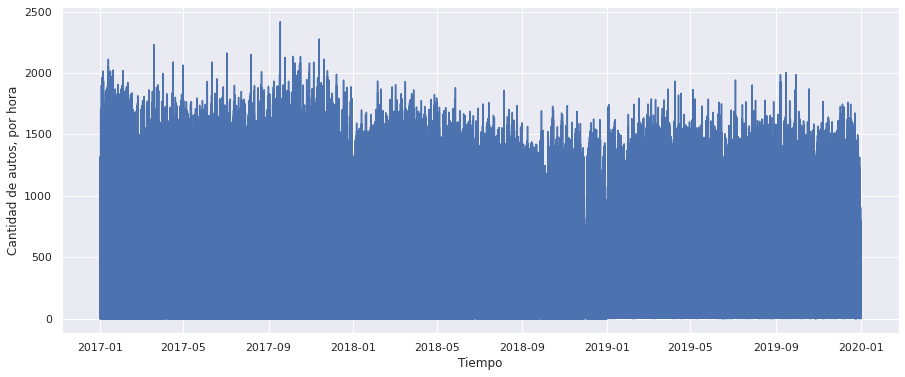

In [166]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [167]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


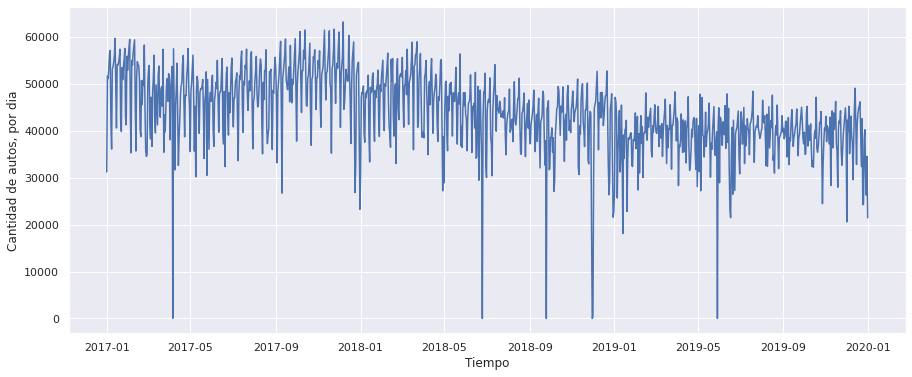

In [168]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

d. Elige cuáles de las siguientes transformaciones de datos son apropiadas para el dataset:

Por el momento por tratarse de series de tiempo, no se considera necesario realizar encoding, escalado de datos y	generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA). si más adelante, se interesa por plantear un modelo de regresión. entonces se debe hacer las respectivas transformaciones que el modelo requiera.

Así, a continuación encuentras tratamiento de	Detección y eliminación de Outiers e	imputación de valores faltantes:



In [169]:
diario[diario.cantidad_pasos<25000]

,cantidad_pasos
fecha,
2017-04-06,40
2017-12-31,23229
2018-06-25,0
2018-09-25,0
2018-11-29,19728
2018-11-30,0
2018-12-01,350
2018-12-30,21559
2018-12-31,22599



Se logra identificar que algunas de las fechas anteriores resultan ser importantes en la historia de Argentina, haciendo que en esta base de datos se encuentren valores atípicos;

**2017-04-06** Fuertes choques entre la policía y los huelguistas en el primer gran paro contra Macri 

**2018-06-25** Argentina, en huelga general de 24 horas contra el rumbo económico de Macri

**2018-09-25** La movilización de 24 horas contra los ajustes impulsados por Macri paraliza sectores clave del país

**2018-11-29** Aterrizan en Buenos Aires los jefes de los países que integran el G-20, las principales economías mundiales. La cumbre estará marcada por las tensiones comerciales entre la administración Trump y otras potencias mundiales

**2018-11-30** Miles de personas marchan contra el G20 bajo un fuerte dispositivo de seguridad

**2018-12-01** El paso silencioso de Michel Temer por el G20

**2018-06-17** Apagón masivo deja sin luz a Argentina y Uruguay

**2019-05-29** La mayor huelga general contra Mauricio Macri paraliza Argentina.

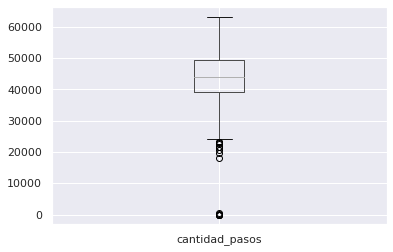

In [170]:
diario.boxplot()

Con el boxplot es evidente de la presencia de outliers en el dataset, en un principio de pensó en eliminarlos, pero luego se pensó en que se alteraria de manera significativa a la base de datos. Pues el tiempo en un principio esta medido en horas, esto lleva a pensar que todos los días presentan algún registro, eliminar algunos días  puede traer consecuencias no favorables. 

Por lo tanto, se sigue el siguiente tratamiento: los outliers se los convierte en valores nulos, para luego ser rellenados con el metodo de interpolación lineal, con la que puede estimar puntos de datos desconocidos entre dos puntos de datos conocidos. 

In [171]:
diario.cantidad_pasos[diario.cantidad_pasos <25000] = np.nan

In [172]:
print(diario.isna().sum())
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    19
dtype: int64
cantidad_pasos    0
dtype: int64


e. Realiza al menos 2 gráficos que aporten información para el entendimiento e interpretación de los datos.

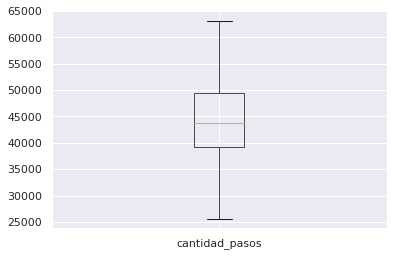

In [173]:
diario.boxplot()

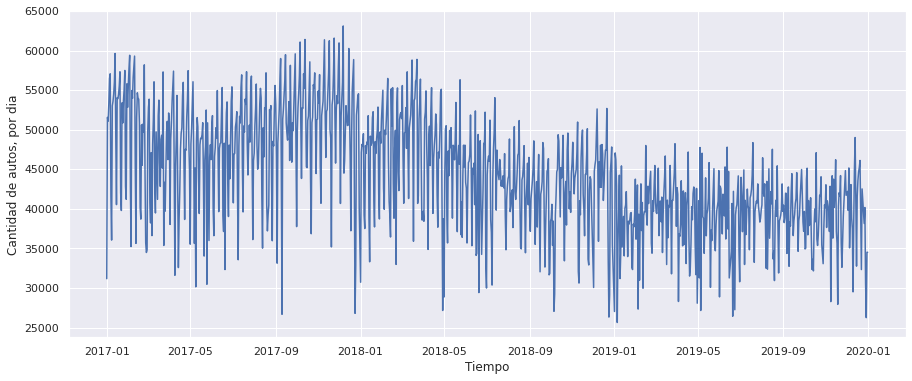

In [174]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Es posible observar una uniformidad con respecto a la cantidad de autos por día.

# Modelo de Machine Learning

f. Desarrolla tu modelo.

# Componentes de la Serie

El método más sencillo se conoce como media móvil. Consiste en tomar una ventana de tiempo suficientemente grande y promediar la serie sobre esa ventana. De esta forma, obtienes la tendencia. Tomate un tiempo para pensar qué significa suficientemente grande. Una característica de este método es que no asume ninguna forma para la serie de tiempo - a diferencia del que te contaremos a continuación - así que suele funcionar en muchos casos.

In [175]:
ventana = int(365*2/7)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

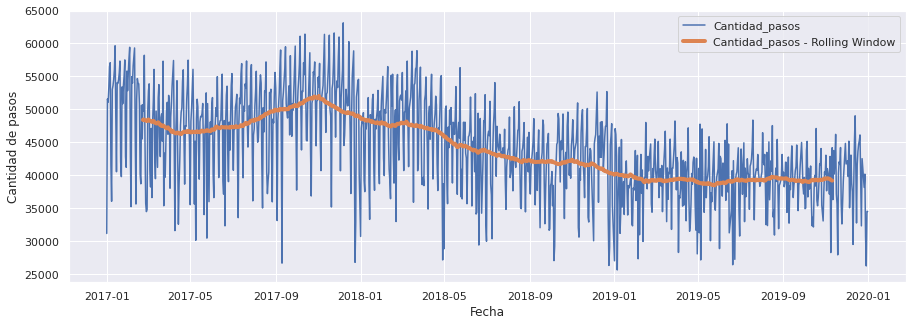

In [176]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad_pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad_pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

**Tendencia Lineal**

In [177]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,31183.0,736330
2017-01-02,51568.0,736331
2017-01-03,51093.0,736332
2017-01-04,53332.0,736333
2017-01-05,56486.0,736334


In [178]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

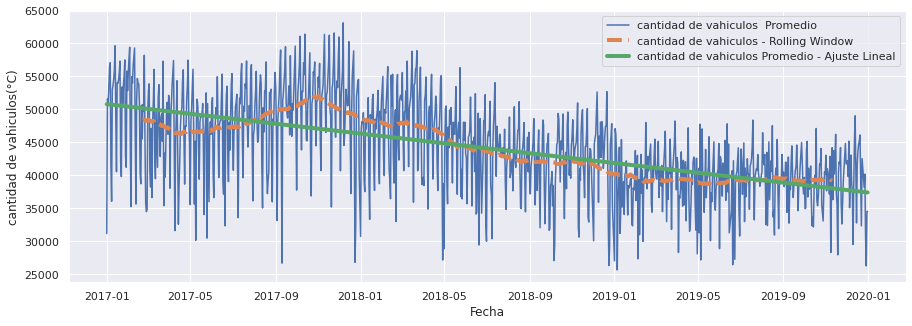

In [179]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'cantidad de vahiculos  Promedio')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'cantidad de vahiculos - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'cantidad de vahiculos Promedio - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('cantidad de vahiculos(°C)')
plt.legend()
plt.show()

Graficamente, medias moviles muestran una mejor tendencia con respecto a los datos reales, mientras que el ajuste lineal muestra un ajuste bajo para los valores que se tiene.


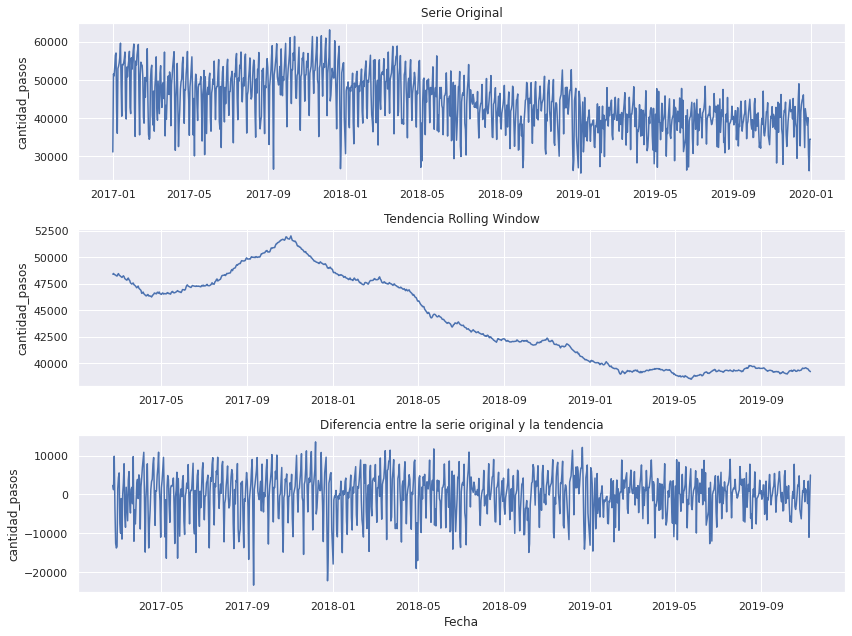

In [180]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('cantidad_pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('cantidad_pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos- diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('cantidad_pasos')

plt.tight_layout()
plt.show()


In [181]:
diario.cantidad_pasos

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    34523.0
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

De lo anterior se puede concluir que la cantidad de vehiculos que transitan por la estación de Ilia diarimente es de alrededor de 450000 vehiculos, con una componente de flujo  del orden de -15000 vehiculos en temporada alta y del orden de 10000 vehiculos en temporada baja

### 2.1. One-Step Prediction

Vamos a entrenar un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo semanal de temperatura. Utilizaremos los diez primeros años como conjunto de entrenamiento. Y los años 11 a 14 como evaluación. Para ello, tenemos que llevar los datos a la forma vista durante la presentación.

Es importante cuando se correlacionan series entre sí tener en cuenta la tendencia. Dos series con tendencias fuertes crecientes estarán trivialmente correlacionadas. Steven Skiena lo explica claramente en The Data Science Design Manual aplicado a series de tiempo de precios:

> *La otra corrección importante es la inflación. El valor en el tiempo del dinero implica que un dólar hoy es (generalmente) más valioso que un dólar al año a partir de ahora (...). Usar precios no ajustados por inflación en un modelo durante períodos de tiempo no-triviales es buscarse problemas. Un grupo de mis estudiantes una vez se entusiasmó mucho con la fuerte correlación observada entre los precios de unas acciones y los precios del petróleo durante un período de treinta años, y por eso intentaron usar los precios de las acciones en un modelo de predicción de productos. Pero ambos bienes tenían un precio en dólares, sin ningún ajuste a medida que se inflaban. La serie temporal de precios de esencialmente cualquier par de artículos se correlacionará fuertemente con el tiempo cuando no corrijas por inflación.*

## 2. Predicción a Futuro

### 2.1. One-Step Prediction

Vamos a entrenar un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo semanal de temperatura. Utilizaremos los diez primeros años como conjunto de entrenamiento. Y los años 11 a 14 como evaluación. Para ello, tenemos que llevar los datos a la forma vista durante la presentación.

In [182]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

En primer lugar, debemos definir cuántos valores *hacia atrás* tomaremos.

In [183]:
look_back = 52*2 # usamos dos anios de datos para predecir el valor siguiente

Creamos los `X` e `y` con ceros para luego llenar con los datos. Notar los `shape`

In [184]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(990, 104) (990,)


Llenamos los `X` e `y`

In [185]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [186]:
print(X)

[[31183.         51568.         51093.         ... 54351.
  42650.         32588.        ]
 [51568.         51093.         53332.         ... 42650.
  32588.         38688.        ]
 [51093.         53332.         56486.         ... 32588.
  38688.         42272.        ]
 ...
 [36628.         38539.         39293.         ... 39622.33333333
  38168.         40182.        ]
 [38539.         39293.         40707.         ... 38168.
  40182.         30681.        ]
 [39293.         40707.         41326.         ... 40182.
  30681.         26259.        ]]


In [187]:
print(y)

[38688.         42272.         47573.         49557.
 50244.         54288.         56002.         45893.
 38668.         47529.         47420.         51580.
 53686.         57473.         48393.         44865.
 35547.         48208.         50211.         53313.
 56077.         46876.         35643.         45178.
 30152.         48562.         51543.         50388.
 43826.         39423.         48099.         48938.
 48873.         49381.         50899.         44007.
 34043.         46186.         47902.         52506.
 30479.         50885.         43087.         36009.
 46552.         48109.         46234.         50576.
 51795.         40054.         36617.         46609.
 47788.         50266.         48962.         54965.
 46901.         39656.         47622.         48274.
 48349.         52191.         55347.         39192.
 37147.         48306.         32336.         48103.
 52155.         53526.         43183.         39042.
 48073.         43811.         48559.         

Es importante notar que el tiempo de la medición - fecha - ya no es parte de los datos.

Hacemos el train/test split. Esta parte puede ser confusa, por lo que presta atención a cómo lo hacemos.

In [188]:
N_train = 10*52 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 4*52 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(416, 104) (416,)
(208, 104) (208,)


In [189]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

Graficamos la importancia de cada feature.

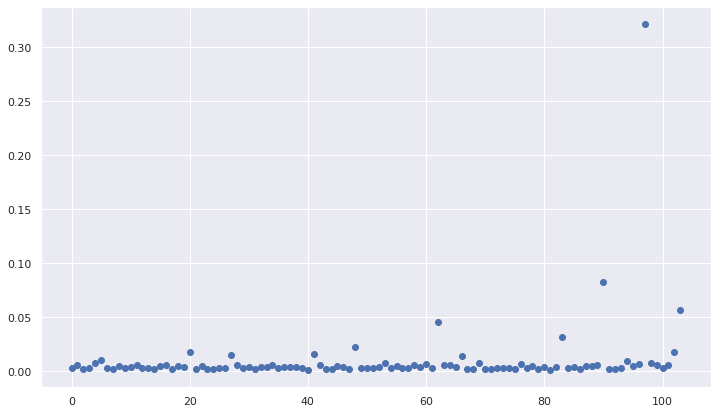

In [190]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
#for x in np.arange(3)*52:
 #   plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

¿A qué atributos les da importancia? Interpretar. Hay dos líneas que puedes descomentar en la celda anterior para ayudarte.

Predecimos.

In [191]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Y graficamos. Este gráfico también puede ser confuso, por lo que presta atención a cada línea. Si quieres, puedes ir comentando y descomentando cada línea para ver bien qué está haciendo y que el gráfico no quede tan sobrecargado.

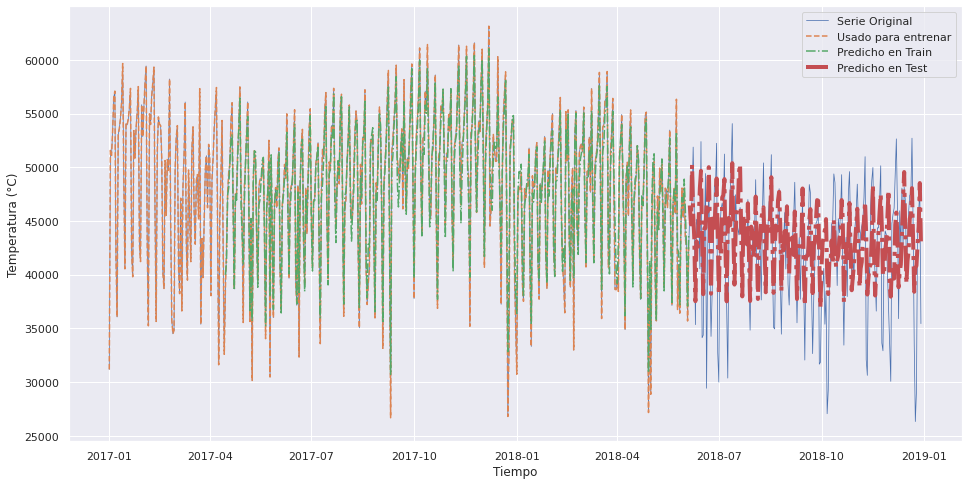

In [192]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

¿Qué les parecen, visualmente, estos resultados?

Calculamos el error RMSE en train y test.

In [193]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1693.90356640301
Error en Test: 4380.63551957828


**Benchmark**: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [194]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

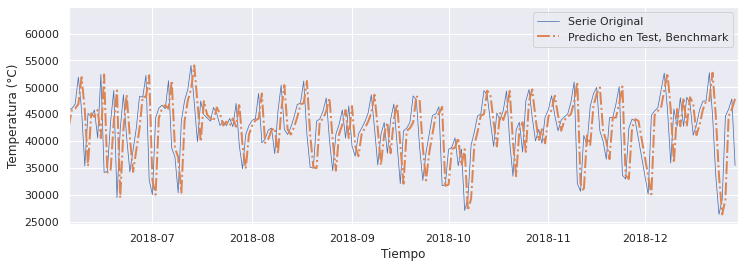

In [195]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [196]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

6222.812473707744


Por lo que parece que, si bien no mucho, el modelo mejora la predicción por sobre el benchmark en el conjunto de test.

### 2.2. Multi-Step Prediction

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [197]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

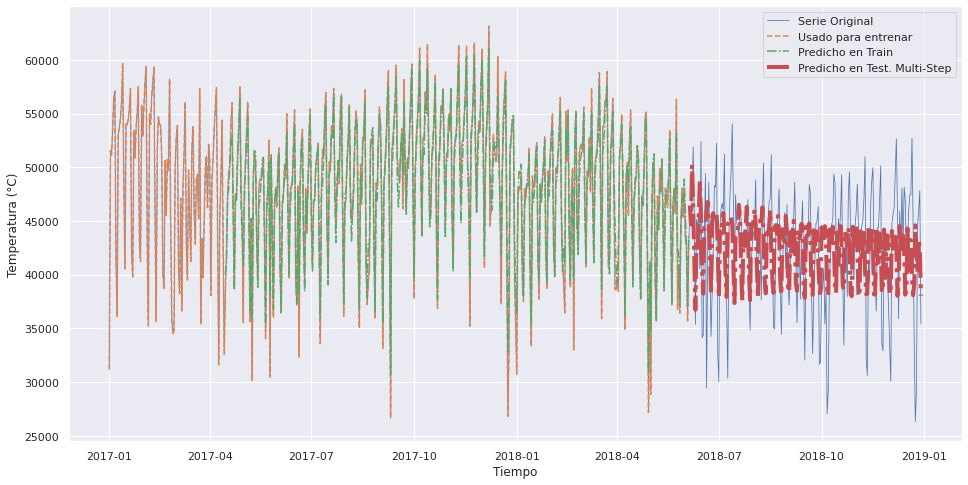

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Y calculamos el error RMSE

In [ ]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 4977.436247382117


¿Qué les parece este resultado?¿Cuál es la diferencia con el One-Step predicton?

**Para pensar:** ¿qué otras formas - vistas durante la carrera - servirán para evaluar estos resultados?

## 3. Prophet

Instala y estudia las características de esta librería. Intenta utilizarla para obtener los componentes de la serie y para predecir. ¡Recuerda seguir la documentación!

Entrenamos

g. Optimiza los hiper parámetros de tu modelo.

h. Elige un modelo benchmark para comparar los resultados de tu modelo.

i. Responde: ¿qué información está usando el modelo para predecir?

# Investigación

j. Plantea nuevas preguntas en base al trabajo que hiciste y en las que se pueda ahondar.

k. Plantea un flujo de trabajo que responda alguna o algunas de esas preguntas.